In [1]:
import pandas as pd

#read json and store in excel
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df.to_csv("data.csv")

In [17]:
# EDA: Plotting the histogram of ratings
rates = []
for i in range(len(df)):
    rates.append(df.iat[i,8])

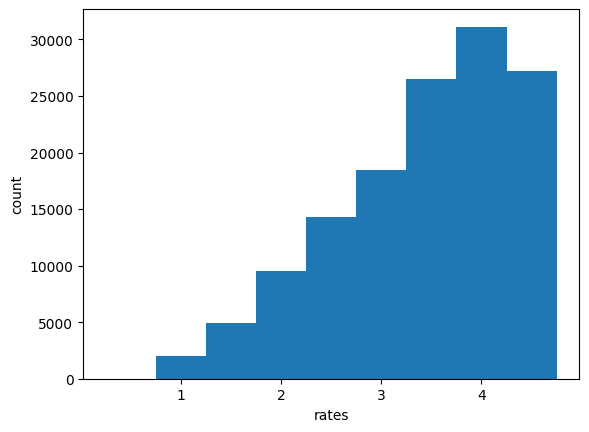

In [5]:
import matplotlib.pyplot as plt
bins = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75]
# plotting histogram
plt.hist(rates, bins = bins)
plt.xlabel('rates')
plt.ylabel('count')
plt.show()

In [6]:
# find the attributes to train on
atts = set()
for i in range(len(df)):
    string = df.iat[i,11]
    if string != None:
        for k in string:
            atts.add(k)  
atts = list(atts)

In [9]:
for i in range(len(atts)):
    df.insert(14+i, atts[i], [None for j in range(len(df))], True)

In [16]:
# unpack the dictionaries within dictionaries
for i in range(len(df)):
    string = df.iat[i,11]
    if string != None:
        for k in string:
            df[k].loc[df.index[i]] = string[k]
